In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [74]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [51]:
titles['title'].value_counts().sort_values(ascending=False).head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
She                     11
Blood Money             11
The Outsider            11
Maya                    11
Kismet                  10
The Promise             10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [21]:
titles[(titles['year'] >= 1930) & (titles['year'] < 1940)]['year'].value_counts().sort_values(ascending=False).head(3)

1937    1185
1936    1127
1938    1115
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

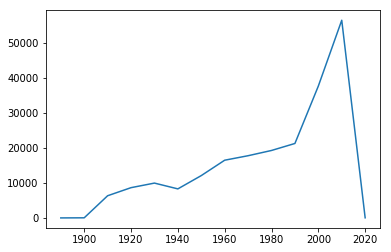

In [33]:
(titles['year'] // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

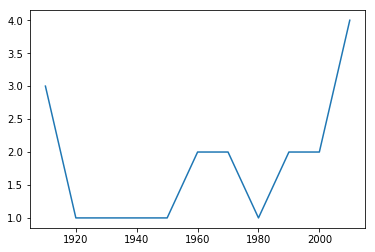

In [37]:
(titles[titles['title'] == 'Hamlet']['year'] // 10 * 10).value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

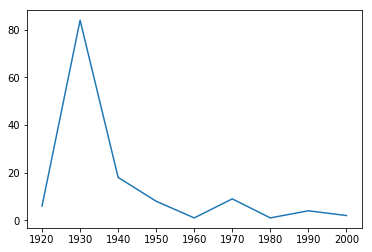

In [47]:
(cast[cast.character == 'Rustler']['year'] // 10 * 10).value_counts().sort_index().plot()

In [49]:
#EZ

### Plot the number of "Hamlet" characters each decade.

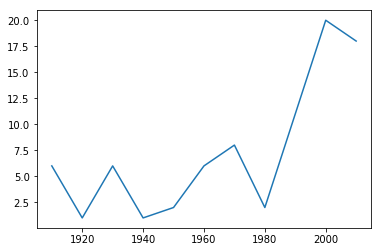

In [50]:
(cast[cast.character == 'Hamlet']['year'] // 10 * 10).value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [ ]:
titles['title'].value_counts().sort_values(ascending=False).head(10)

In [55]:
cast.character.value_counts().head(11)

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [61]:
cast[cast['character'] == 'Herself']['name'].value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Joan Rivers             7
Mary Jo Pehl            7
Caroline Rhea           5
Bunny Yeager            5
Sally Jessy Raphael     5
Rekha                   5
Juhi Chawla             5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [62]:
cast[cast['character'] == 'Himself']['name'].value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Winston Churchill        20
George W. Bush           20
Bill Clinton             20
Franklin D. Roosevelt    20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [97]:
cast[cast['year'] == 1945][['title', 'name']].groupby('name').count().sort_values(by='title', ascending=False).head(5)

,title
name,
Emmett Vogan,39
Sam (II) Harris,30
Bess Flowers,28
Harold Miller,28
Nolan Leary,27


### Which actors or actresses appeared in the most movies in the year 1985?

### Plot how many roles Mammootty has played in each year of his career.

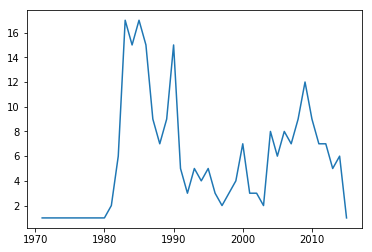

In [104]:
cast[cast.name == 'Mammootty']['year'].value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [107]:
cast[cast['character'].str.startswith('Patron in')]['character'].value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

### Plot the n-values of the roles that Judi Dench has played over her career.

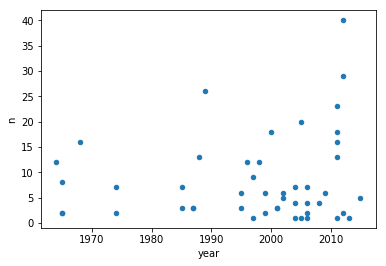

In [113]:
cast[cast['name'] == 'Judi Dench'][['year', 'n']].sort_values(by='year').plot(kind='scatter', x='year', y='n')

In [116]:
cast[(cast['name'] == 'Judi Dench') & (cast['n'] > 20)]

,title,year,name,type,character,n
2483930,Henry V,1989,Judi Dench,actress,Mistress Nell Quickly,26.0
2483941,My Week with Marilyn,2011,Judi Dench,actress,Dame Sybil Thorndike,23.0
2483949,Run for Your Wife,2012,Judi Dench,actress,Bag Lady,40.0
2483953,Stars in Shorts,2012,Judi Dench,actress,Mary,29.0


### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

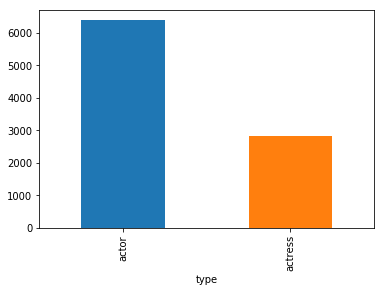

In [126]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'] == 1)].groupby('type').count()['year'].plot(kind='bar')

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

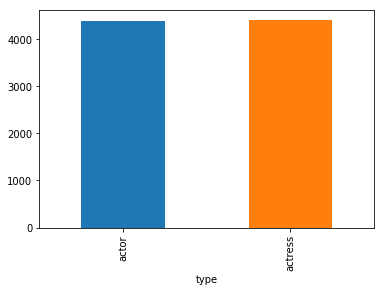

In [127]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'] == 2)].groupby('type').count()['year'].plot(kind='bar')